### Codio Activity 23.1: Basic Neural Net for Image Data


This activity focuses on using a basic neural net architecture to predict handwritten digit labels.  Using the basic architecture you will also explore data augmentation using simple transformations of the images to create new data for the network.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


Run the code cell below to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

### The Dataset

You will be using the `mnist` dataset which is included in the `datasets` module of the `keras` library. This dataset contains observations that are 28 x 28 pixel images of handwritten digits.  The labels correspond to the actual digit, forming a 10 category classification problem for you.  Below, the data is loaded and reshaped in anticipation of the neural network architecture.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 [==============================] - 0s 0us/step

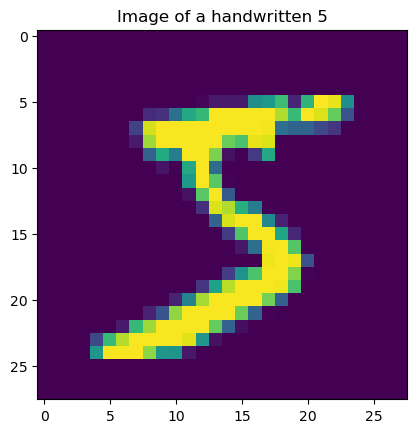

In [3]:
plt.imshow(X_train[0])
plt.title(f'Image of a handwritten {y_train[0]}');

### Problem 1

#### Using a Convolutional Architecture

Below, use the TensorFlow function `Sequential()` to build a convolutional neural network using the following functions and configurations:

- Use `Flatten` to flatten the images
- Use a single `Dense` hidden layer with 60 nodes and a `relu` activation
- Use a single `Dense` hidden layer with 10 nodes and a `softmax` activiation.

Assign this network to the variable `model`.

Compile `model` using `categorical_crossentropy` as your `loss` and  `accuracy` as your `metric`.

Fit your model to the training data `X_train` and ` Y_train` including `X_test, Y_test` as your validation data. In this step, set the variable `verbose` equal to `0` and the number of `epochs` equal to 2.

Assign the fit model to the `history` variable below.

NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power. 

In [4]:
tf.random.set_seed(42)
model = Sequential([Flatten(),
                    Dense(60, activation = 'relu'),
                   Dense(10, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
         verbose = 0, 
                   epochs = 2)

print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

2025-11-22 15:30:33.852849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2025-11-22 15:30:33.856859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0.9061999917030334
0.9063000082969666


### Problem 2

#### Data Augmentation

One way to attempt a model improvement is to create new inputs to the network based on transformed versions of the original data.  


In the code cell below, use the `ImageDataGenerator` function from `keras` with the arguments `horizontal_flip` and `vertical_flip` both equal to `True` to create a new version of the train and test data that performs both a horizontal and vertical flip of the images. Assign this new object to the variable `gen` below.  

Perform the horizontal and vertical flips on the training sets by using the `.flow` method on `gen` with arguments `X_train` and `y_train`. Assign this new object to the variable `train_gen`.

Perform the horizontal and vertical flips on the testing sets by using the `.flow` method on `gen` with arguments `X_test` and `y_test`. Assign this new object to the variable `test_gen`.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.random.set_seed(42)
gen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
train_gen = gen.flow(X_train, Y_train)
test_gen = gen.flow(X_test, Y_test)

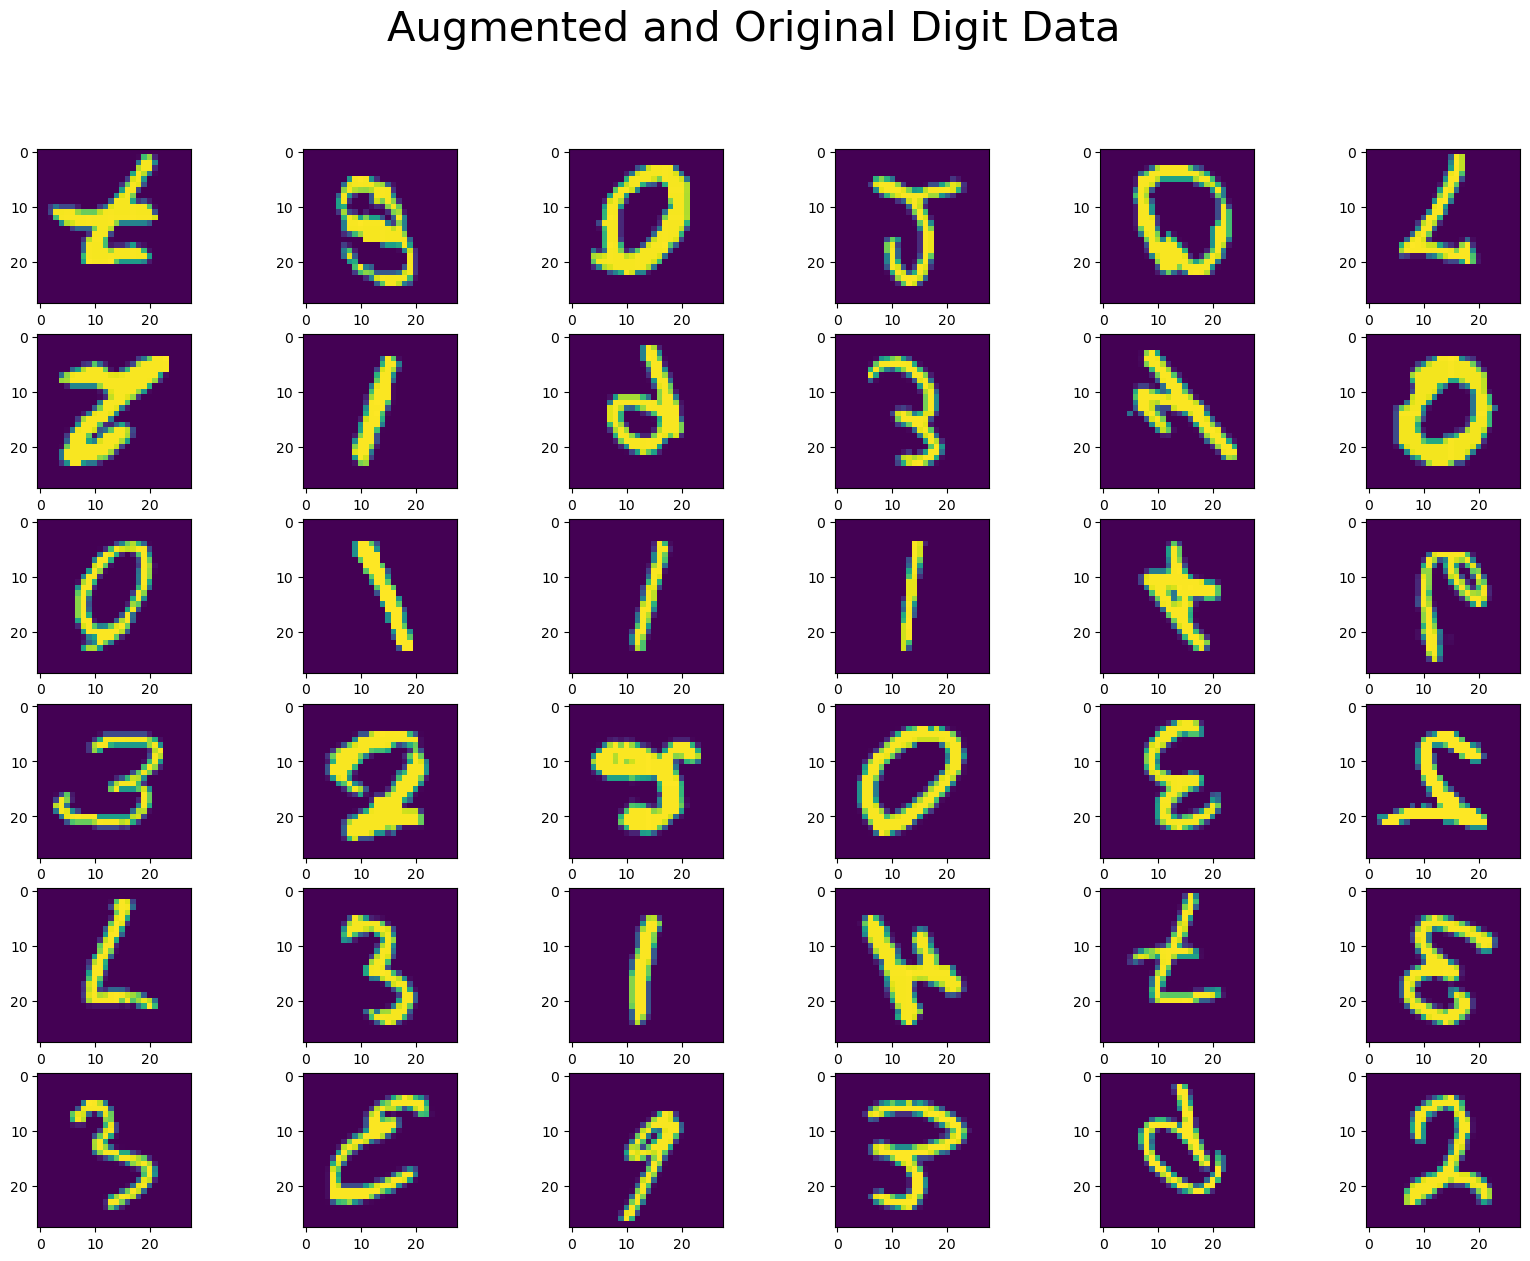

In [7]:
fig, ax = plt.subplots(6, 6, figsize = (20, 14))
for i in range(6):
    for j in range(6):
        pic = train_gen.next()
        ax[i, j].imshow(pic[0][0].reshape(28, 28))
plt.suptitle("Augmented and Original Digit Data", fontsize = 30);

### Problem 3

#### Training a model on the augmented data

Now, your aim is to compare the performance of the convolutional architecture on the augmented version of the data.  You can replace `X_train` and `X_test` in your model fitting with `train_gen` and `test_gen`.  

Create a new model, `aug_model`, with the identical architecture to the first network in **Problem 1** and compile it using the same settings as in **Problem 1**.

This time, fit your model to the data `train_gen` defined in **Problem 2** and use `test_gen` as `validation_data`. In this step, set the variable `verbose` equal to `0` and the number of `epochs` equal to 2.

Assign the fit model to the `augmented_history` variable below.

NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power.


In [11]:
tf.random.set_seed(42)
aug_model = Sequential([Flatten(),
                      Dense(60,activation = 'relu'),
                      Dense(10, activation = 'softmax')])
aug_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
augmented_history = aug_model.fit(train_gen, validation_data = test_gen, epochs = 2, verbose = 0)
print(augmented_history.history['accuracy'][-1])
print(augmented_history.history['val_accuracy'][-1])

0.5484833121299744
0.6037999987602234


Note the performance difference and think about why it either improved or declined after using the augmented data. 